SMOTE와 ADASYN에서 k-neighbors를 조절하여 변화에 대해 설명하고, Random Undersampling, Random Oversampling 기법을 사용하였을 때와 비교하세요. 
단, 조별로 지난 시간에 사용하였던 분류 모델을 사용하고, 데이터가 어떻게 구분되었는지 시각적으로 보여주세요. (영역 구분 또는 점 모양, 색깔 구분 등의 방법 사용)

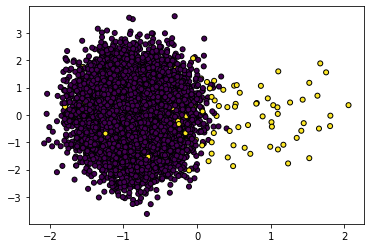

In [63]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

X1, Y1 = make_classification(n_samples=10000, weights=[0.99],  n_clusters_per_class = 1, random_state = 2021 )
plt.scatter(X1[:, 0]  , X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

<h2>Random UnderSampler</h2>

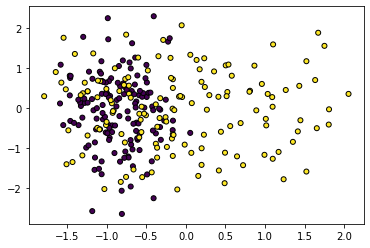

In [69]:
from imblearn.under_sampling import RandomUnderSampler

X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X1, Y1)

plt.scatter(X_resampled[:, 0]  , X_resampled[:, 1], marker='o', c=y_resampled, s=25, edgecolor='k')
plt.show()

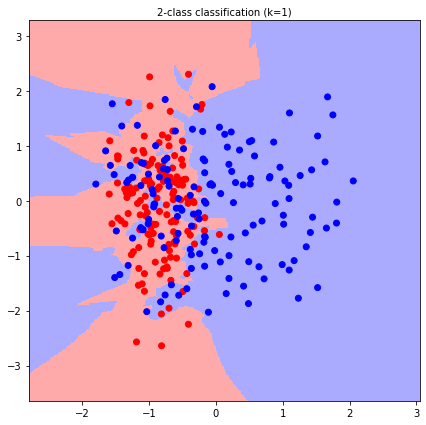

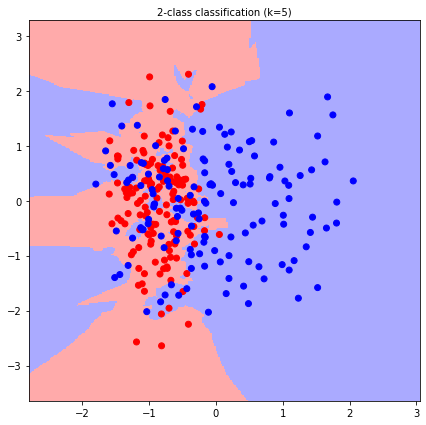

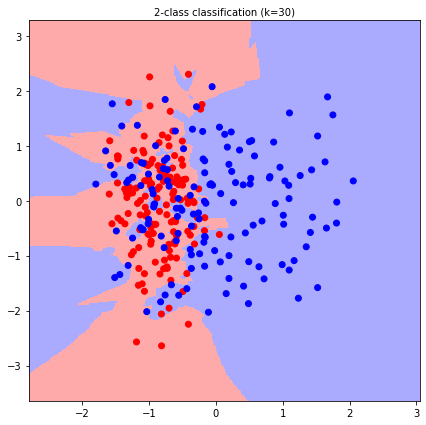

In [65]:
from matplotlib.colors import ListedColormap

x_vis = X_resampled[:,:2]
y_vis = y_resampled

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [1, 5, 30]:
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(x_vis, y_vis)

    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                            np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)

plt.show()

<h2>Random OverSampler</h2>

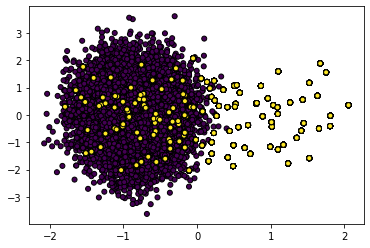

In [67]:
from imblearn.over_sampling import RandomOverSampler

X_Oresampled, y_Oresampled = RandomOverSampler(random_state=2021).fit_resample(X1, Y1)

plt.scatter(X_resampled[:, 0]  , X_resampled[:, 1], marker='o', c=y_resampled, s=25, edgecolor='k')
plt.show()

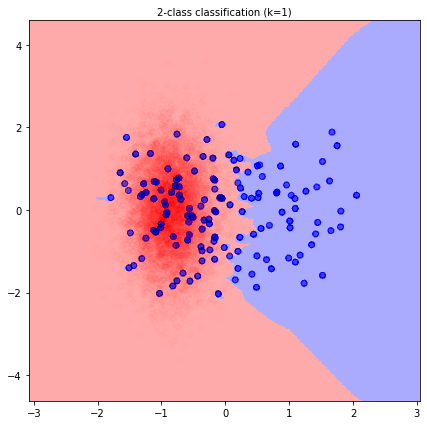

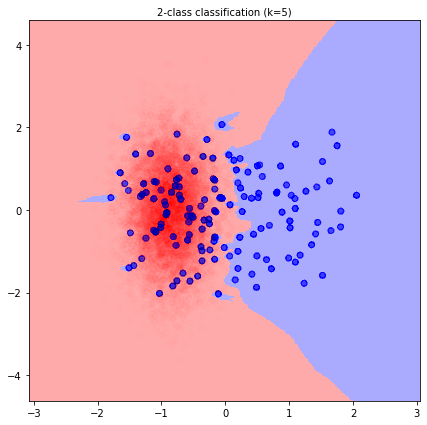

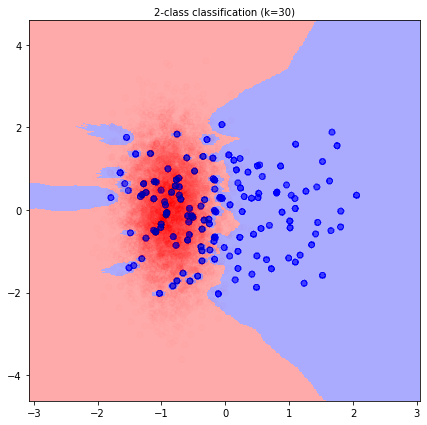

In [101]:
x_vis = X_Oresampled[:,:2]
y_vis = y_Oresampled

h=.02

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

for k in [1, 5, 30]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_vis, y_vis)

    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                            np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold,alpha=0.01)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)

plt.show()

<h2>SMOTE</h2>

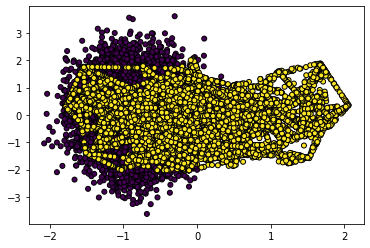

In [91]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)

X_SMOTEres, y_SMOTEres = sm.fit_resample(X1, Y1)

plt.scatter(X_SMOTEres[:, 0]  , X_SMOTEres[:, 1], marker='o', c=y_SMOTEres, s=25, edgecolor='k')
plt.show()

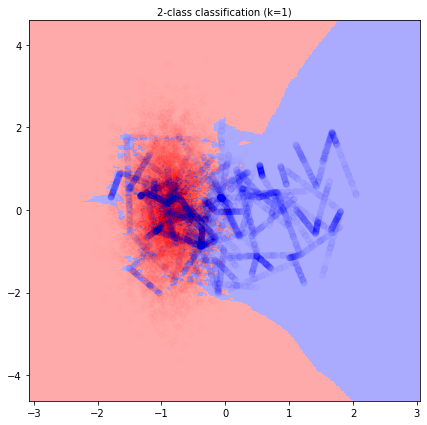

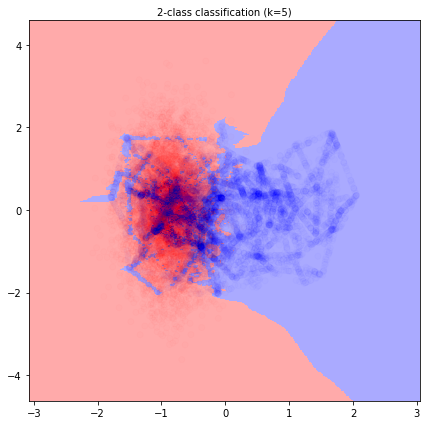

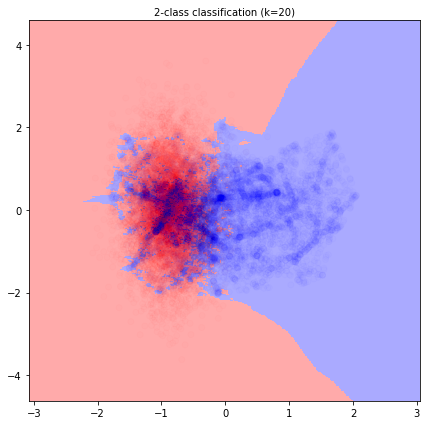

In [100]:
for k in [1, 5, 20]:
    sm = SMOTE(random_state=42, k_neighbors=k)
    
    X_SMOTEres, y_SMOTEres = sm.fit_resample(X1, Y1)
    
    clf = KNeighborsClassifier()
    clf.fit(x_vis, y_vis)

    x_vis = X_SMOTEres[:,:2]
    y_vis = y_SMOTEres
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                            np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold,alpha=0.01)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)

plt.show()

<h2>ADASYN</h2>

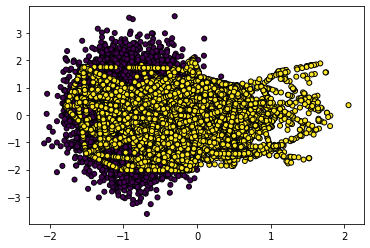

In [93]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=42, n_neighbors=5)

X_ADASYNres, y_ADASYNres = ada.fit_resample(X1, Y1)

plt.scatter(X_ADASYNres[:, 0]  , X_ADASYNres[:, 1], marker='o', c=y_ADASYNres, s=25, edgecolor='k')
plt.show()

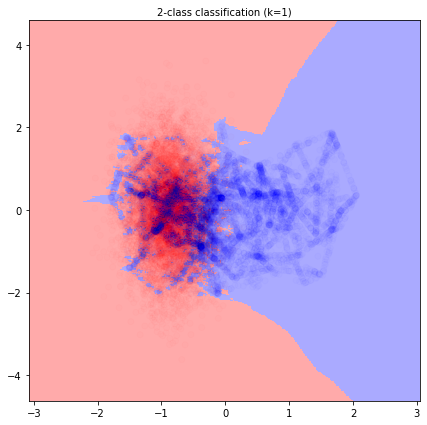

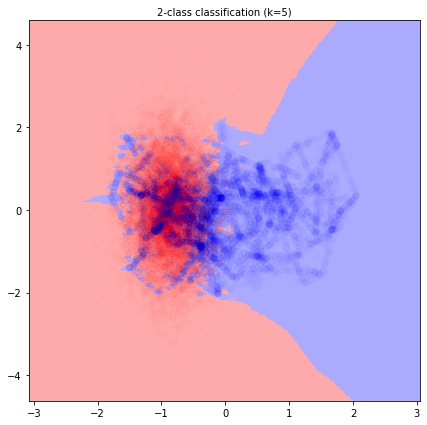

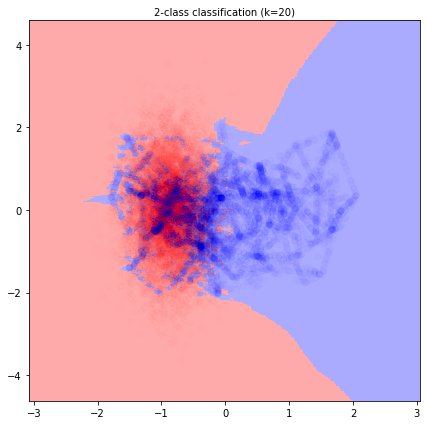

In [99]:
for k in [1, 5, 20]:
    ada = ADASYN(random_state=42, n_neighbors=k)
    
    X_ADASYNres, y_ADASYNres = ada.fit_resample(X1, Y1)
    
    clf = KNeighborsClassifier()
    clf.fit(x_vis, y_vis)

    x_vis = X_SMOTEres[:,:2]
    y_vis = y_SMOTEres
    
    x_min, x_max= x_vis[:,0].min()-1, x_vis[:,0].max()+1
    y_min, y_max= x_vis[:,1].min()-1, x_vis[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                            np.arange(y_min, y_max,h))
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z= Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)

    plt.scatter(x_vis[:,0],x_vis[:,1],c=y_vis,cmap=cmap_bold,alpha=0.01)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    plt.title(f"2-class classification (k={k})",fontsize=10)

plt.show()